## Example Notebook:
John Mays | maysj at-symbol omb dot nyc dot gov | Policy & Operations Research @ OMB | Last Updated: 06/05/24

Displaying the functionality of the heatmap function in two ways.

### Setup:

In [1]:
# import libraries and our code:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

from heatmap import create_granular_map

In [2]:
# import data:
borough_boundaries = gpd.read_file('./data/borough_boundaries.geojson').to_crs(epsg=2263) 
# (EPSG:2263 is NY & Long Island Projection in US Survey Feet)
hpa_calls_coords = pd.read_parquet('./data/hpa_calls_past_12_coords.parquet')

In [3]:
hpa_calls_coords = hpa_calls_coords.rename({'x_coordinate_state_plane': 'x',
    'y_coordinate_state_plane': 'y'}, axis='columns')
hpa_calls_coords.head()

,x,y
0,1006050.0,210148.0
1,987097.0,221997.0
2,994085.0,170026.0
3,985948.0,204893.0
4,989855.0,224969.0


### Example: Plot a Heatmap:

In [4]:
# first, you may want to set your boundaries.
# in this case, I will set them to the optima of all of my coords:
x_min, x_max = hpa_calls_coords.x.min(), hpa_calls_coords.x.max()
y_min, y_max = hpa_calls_coords.y.min(), hpa_calls_coords.y.max()
bounds = (x_min, y_min, x_max, y_max)

In [5]:
intensity_map = past_12_map = create_granular_map(hpa_calls_coords.x,
    hpa_calls_coords.y, area_size=250, bounds=bounds, root=5)

Resolution of map (width by height) will be: 583 by 604 250 foot squares.
1 coords were not within bounds.


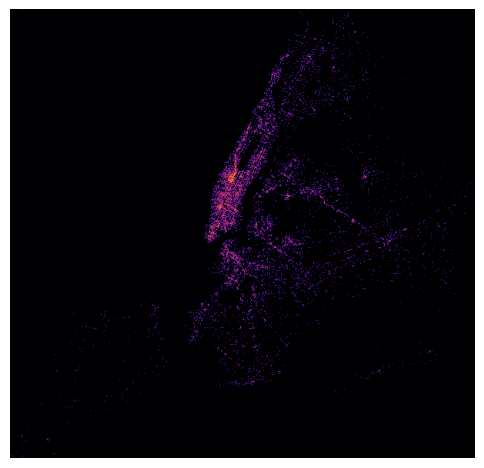

In [6]:
fig, axes = plt.subplots(figsize=(6,6))
axes.imshow(intensity_map, cmap='inferno')
axes.axis('off')
axes.set_aspect('equal')
plt.show()

### Example: Plot Boundaries with Heatmap:
The last example is good, but let's take it one step further with the inclusion of borough boundaries.

In [7]:
# get the boundaries from the geodataframe of borough boundaries:
x_min, y_min, x_max, y_max = borough_boundaries['geometry'].total_bounds
# and add padding:
padding = 5280
bounds = (x_min-padding, y_min-padding, x_max+padding, y_max+padding)

In [8]:
# call the function again only with the new boundaries:
intensity_map = past_12_map = create_granular_map(hpa_calls_coords.x,
    hpa_calls_coords.y, area_size=250, bounds=bounds, root=5)

Resolution of map (width by height) will be: 653 by 659 250 foot squares.
0 coords were not within bounds.


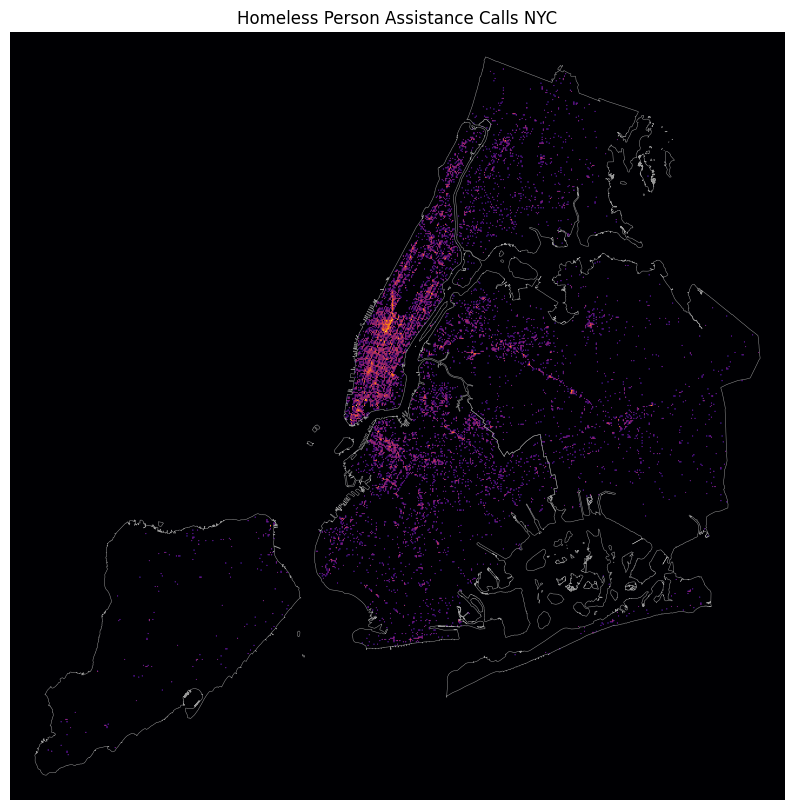

In [9]:
# plot:
fig, axes = plt.subplots(figsize=(10, 10))
axes.imshow(intensity_map, extent=[bounds[i] for i in [0, 2, 1, 3]], cmap='inferno')
borough_boundaries.plot(color='none', edgecolor='#999999', linewidth=0.35, ax=axes)
axes.axis('off')
axes.set_title('Homeless Person Assistance Calls NYC')
axes.set_aspect('equal')
plt.show()

In [10]:
# turn blur on:
intensity_map = past_12_map = create_granular_map(hpa_calls_coords.x,
    hpa_calls_coords.y, area_size=250, bounds=bounds, root=5, blur=True, sigma=2)

Resolution of map (width by height) will be: 653 by 659 250 foot squares.
0 coords were not within bounds.


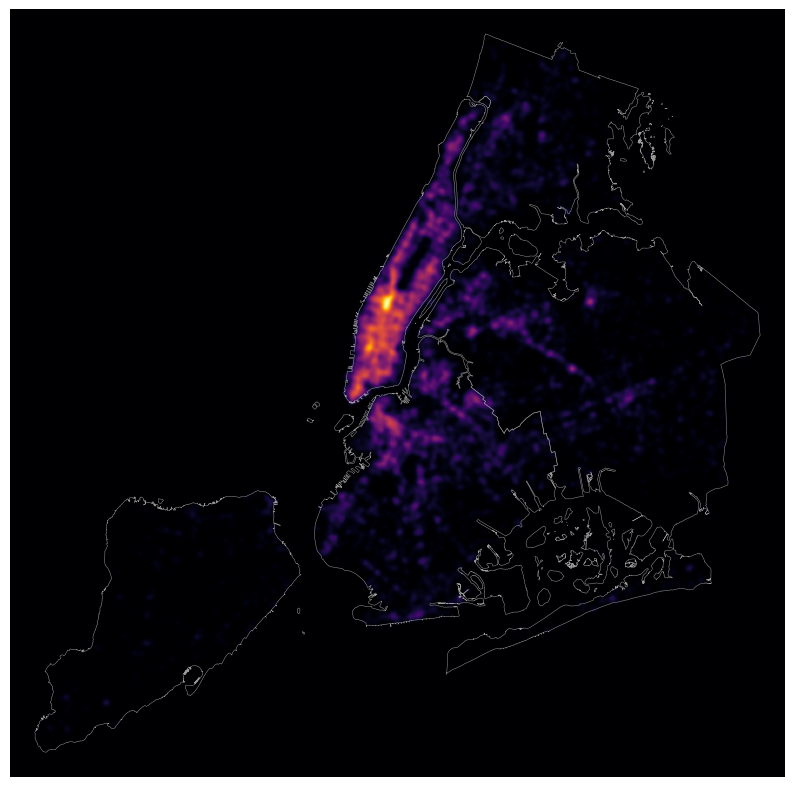

In [11]:
# plot again:
fig, axes = plt.subplots(figsize=(10, 10))
axes.imshow(intensity_map, extent=[bounds[i] for i in [0, 2, 1, 3]], cmap='inferno')
borough_boundaries.plot(color='none', edgecolor='#999999', linewidth=0.35, ax=axes)
axes.axis('off')
axes.set_aspect('equal')
plt.show()